In [21]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels, features=(0,1), ax=plt):
        ax.scatter(
            X[:,features[0]],
            X[:,features[1]],
            c=plt_labels,
            edgecolor='black'
        )

In [32]:
normalization = lambda X: (X - X.min(0)) / (X.max(0) - X.min(0))

standarization = lambda X: (X - X.mean(0)) / X.std(0)


In [53]:
X1 = np.random.rand(5000, 2)  * np.array([1, 1000])
X2 = np.random.rand(5000, 2)  * np.array([1, 1000]) + np.array([1.5, 0])

X = np.concatenate((X1, X2))

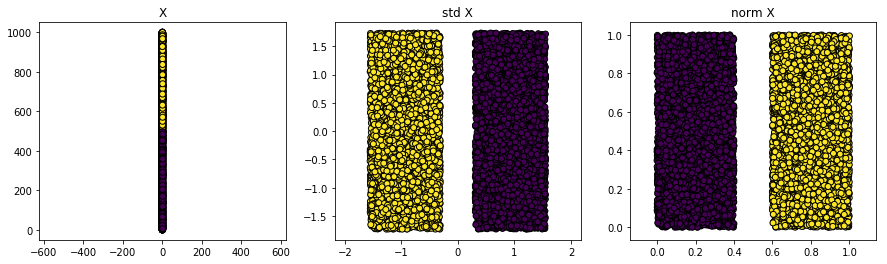

In [55]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
for ax, _X, name in zip(axes, [X, standarization(X), normalization(X)], ['X', 'std X', 'norm X']):
    k_means = KMeans(n_clusters=2)
    k_means.fit(_X)
    plotClustering(_X, k_means.labels_, ax=ax)
#     ax.axis('equal')
    ax.set_title(f'{name}')

/home/michal/anaconda3/lib/python3.7/site-packages/sklearn/cluster/birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


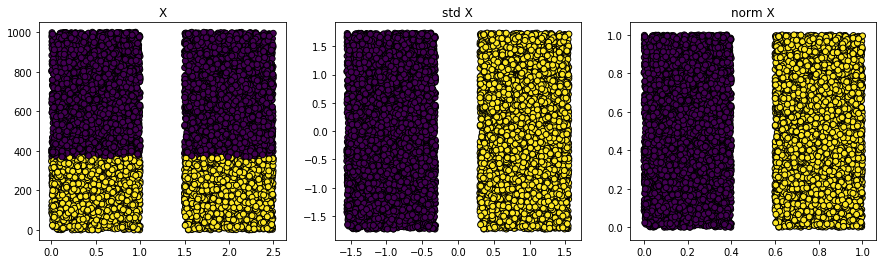

In [64]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
for ax, _X, name in zip(axes, [X, standarization(X), normalization(X)], ['X', 'std X', 'norm X']):
    birch = Birch(n_clusters=2, threshold=0.2)
    birch.fit(_X)
    plotClustering(_X, birch.labels_, ax=ax)
#     ax.axis('equal')
    ax.set_title(f'{name}')

[-1]
[0 1]
[0 1]


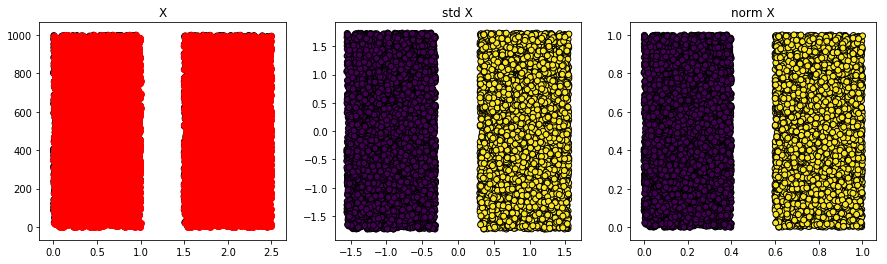

In [72]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
for ax, _X, name in zip(axes, [X, standarization(X), normalization(X)], ['X', 'std X', 'norm X']):
    dbscan = DBSCAN(eps=0.2, min_samples=25)
    dbscan.fit(_X)
    plotClustering(_X, dbscan.labels_, ax=ax)
    
    ax.scatter(_X[dbscan.labels_ < 0, 0], _X[dbscan.labels_ < 0, 1], c='r'  )
#     ax.axis('equal')
    ax.set_title(f'{name}')